In [176]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [177]:
train = pd.read_excel('아버지아들키.xlsx', sheet_name='train')
test = pd.read_excel('아버지아들키.xlsx', sheet_name='test')

In [178]:
X_train = train["Father"]
y_train = train["Son"]

X_test = test["Father"]
y_test = test["Son"]

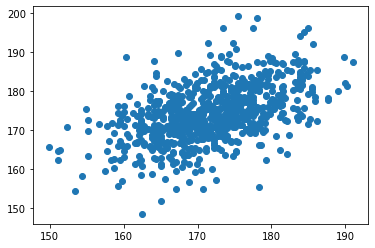

In [179]:
plt.scatter(X_train, y_train)

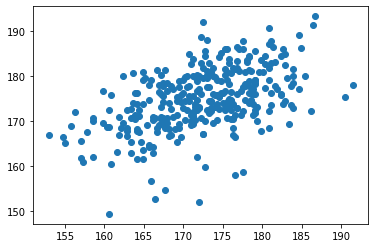

In [180]:
plt.scatter(X_test, y_test)

In [181]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [199]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 50)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5 = GradientBoostingRegressor()
model6 = xgb.XGBRegressor()
model7 = LGBMRegressor()

In [200]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

LGBMRegressor()

In [205]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)
predict4 = model4.predict(X_train)
predict5 = model5.predict(X_train)
predict6 = model6.predict(X_train)
predict7 = model7.predict(X_train)

<BarContainer object of 7 artists>

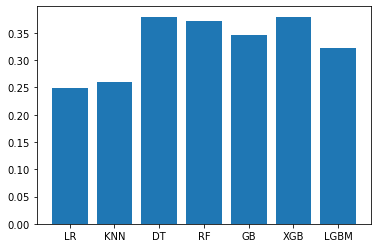

In [206]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM"]
scores = [r2_score(y_train, predict1), r2_score(y_train, predict2),
          r2_score(y_train, predict3), r2_score(y_train, predict4),
          r2_score(y_train, predict5), r2_score(y_train, predict6),
          r2_score(y_train, predict7)]

plt.bar(model_name, scores)

<BarContainer object of 7 artists>

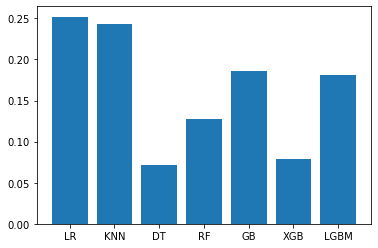

In [194]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM"]
scores = [r2_score(y_test, predict1), r2_score(y_test, predict2),
          r2_score(y_test, predict3), r2_score(y_test, predict4),
          r2_score(y_test, predict5), r2_score(y_test, predict6),
          r2_score(y_test, predict7)]

plt.bar(model_name, scores)

In [114]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3)/3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.23398432944810033


In [115]:
# 가중 평균
avg_predict = ((24*predict1) + (25*predict2) + (7*predict3))/56
print("가중 평균 성능: ", r2_score(y_test, avg_predict))

가중 평균 성능:  0.24774542883342976


# 다음 모델들의 성능을 비교하는 bar 그래프를 표현해봅시다
- 선형 회귀
- KNN
- 의사결정나무
- 랜덤 포레스트
- 그래디언트 부스팅
- XG 부스팅
- Light GBM